# Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
x = np.arange(-10, 10, 0.1)
def show_plot(func, x, func_name):
    y = func(x)
    plt.plot(x, y)
    plt.title(func_name)
    plt.grid()
    plt.ylim(min(y) - 0.1, max(y) + 0.1)
    plt.show()

## Sigmoid Function
$$f(x) = \frac{1}{1 + e^-x}$$

In [2]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

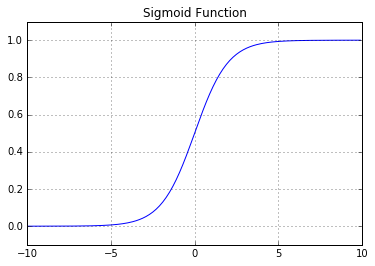

In [3]:
show_plot(sigmoid, x, 'Sigmoid Function')

## Hyperbolic Tangent Function
$$tanh(x) = \frac{e^x - e^-x}{e^x + e^-x}$$

In [4]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

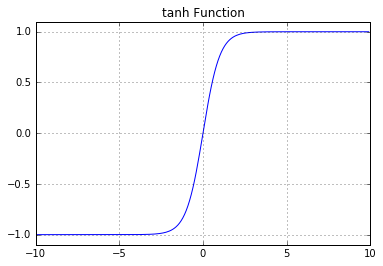

In [5]:
show_plot(tanh, x, 'tanh Function')

## ReLU
$$f(x) = max(0, x)$$

In [6]:
def relu(x):
    return np.maximum(0, x)

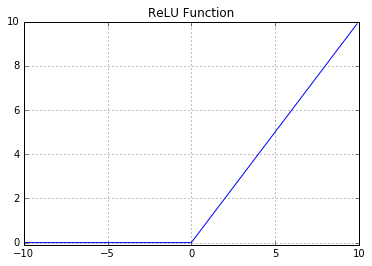

In [7]:
show_plot(relu, x, 'ReLU Function')

## Leaky ReLU
ReLU에서 발생하는 "dying ReLU problem"을 해결하기 위해 제시된 함수이다.
ReLU는 $x<0$인 경우 항상 함수값 0을 리턴하지만 Leaky ReLU는 작은 기울기를 부여한다.
$$f(x) = max(0.01x, x)$$

In [8]:
def leaky_relu(x):
    return np.maximum(0.01*x, x)

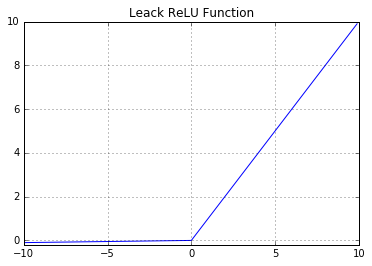

In [9]:
show_plot(leaky_relu, x, 'Leack ReLU Function')

## PReLU
PReLU는 파라미터 $alpha$를 추가하여, $x < 0$일 때의 기울기를 트레이닝 할 수 있게 하였다.
$$f(x) = max(\alpha x, x)$$

In [14]:
def prelu(x):
    alpha = 0.1
    return np.maximum(alpha * x, x)

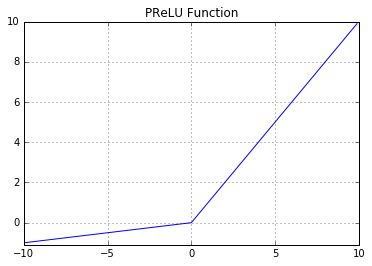

In [15]:
show_plot(prelu, x, 'PReLU Function')

## ELU(Exponential Linear Units)
ReLU-like함수들과의 비교 그림과 공식을 보면 알겠지만 ELU는 ReLU의 threashold를 -1로 낮춘 함수를 exex를 이용하여 근사한 것이다. ELU의 특징은 다음과 같다.

ReLU의 장점을 모두 포함한다.
dying ReLU 문제를 해결하였다.
출력값이 거의 zero-centered에 가깝다.
하지만 ReLU, Leaky ReLU와 달리 exp()를 계산해야하는 비용이 든다.

$f(x)=
\left\{
        \begin{array}{ll}
                x & \mbox{if } x > 0 \\
                \alpha(e^x-1) & \mbox{if } x \leq 0 
        \end{array}
\right.$

In [12]:
def elu(x):
    alpha = 0.8
    y = list(alpha * (np.exp(x[x<0]) - 1))
    for i in x[x>0]:
        y.append(i)
    return y

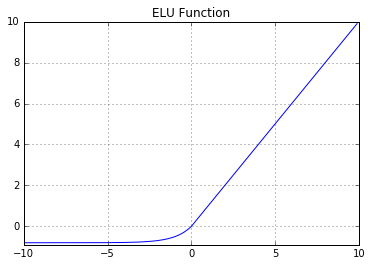

In [13]:
show_plot(elu, x, 'ELU Function')

## Maxout
ReLU와 Leaky ReLU를 일반화 한 것이다.
위 식을 보면 알겠지만 ReLU와 Leaky ReLU는 이 함수의 특수한 경우이다. 예를 들어 ReLU는 w1,b1=0w1,b1=0 인 경우이다. Maxout은 ReLU가 갖고 있는 장점을 모두 가지며, dying ReLU 문제도 해결한다. 하지만 ReLU 함수와 달리 한 뉴런에 대해 파라미터가 두배이기 때문에 전체 파라미터가 증가한다는 단점이 있다.
$$f(x) = max(w_1^Tx + b_1, w_2^Tx + b_2)$$